In [ ]:
%pylab inline

In [58]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (16,10)

In [59]:
# my data
X = np.array([1.34, 2.43, 2.9, 3.37, 3.56, 4.1, 5.37, 6.23, 7.07, 7.63, 9.06, 9.84, 9.96, 12.14, 12.83, 13.21, 13.2],dtype=np.float64)
Y = np.array([13.4, 8.24, 5.97, 4.58, 4.72, 3.33, 1.77, 1.04, 0.69, 0.52, 0.27, 0.17, 0.17, 0.06, 0.04, 0.03, 0.03], dtype=np.float64)

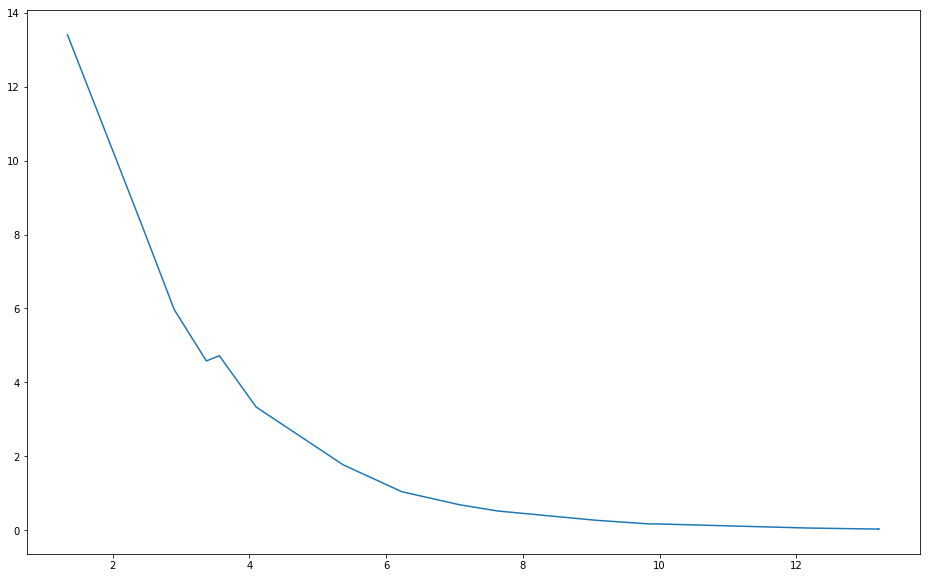

In [60]:
plt.plot(X, Y)

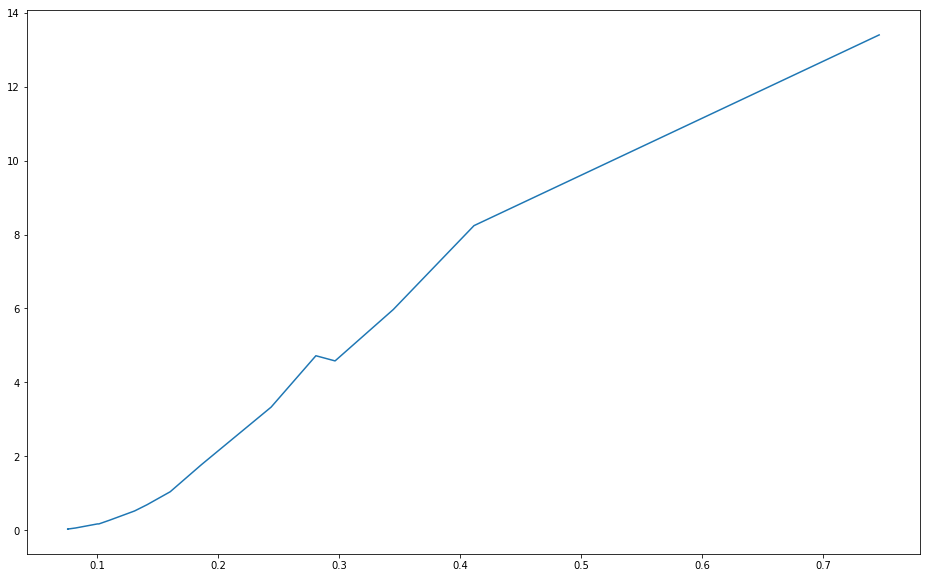

In [61]:
plt.plot(1/X, Y)

In [62]:
X_data = X.reshape((-1,1))
Y_data = Y

In [63]:
def ifunc(x):
    return x

def create_model(X, Y):
    lr = LinearRegression(fit_intercept=True)
    return lr.fit(X,Y)

def predict(X, Y, fx, fy, ify):
    Xf = fx(X)
    Yf = fy(Y)
    model = create_model(Xf,Yf)
    Ypf = model.predict(Xf)
    Yp = ify(Ypf)
    return model, Yp

In [64]:
models = [
    predict(X_data, Y_data, ifunc, ifunc, ifunc),
    predict(X_data, Y_data, np.log, ifunc, ifunc),
    predict(X_data, Y_data, np.reciprocal, ifunc, ifunc),
    predict(X_data, Y_data, np.reciprocal, np.log, np.exp),
    predict(X_data, Y_data, np.log, np.log, np.exp),
    predict(X_data, Y_data, np.reciprocal, np.log, np.exp),
    predict(X_data, Y_data, ifunc, np.reciprocal, np.reciprocal),
    predict(X_data, Y_data, ifunc, ifunc, ifunc),
    predict(X_data, Y_data, np.reciprocal, np.reciprocal, np.reciprocal)
]

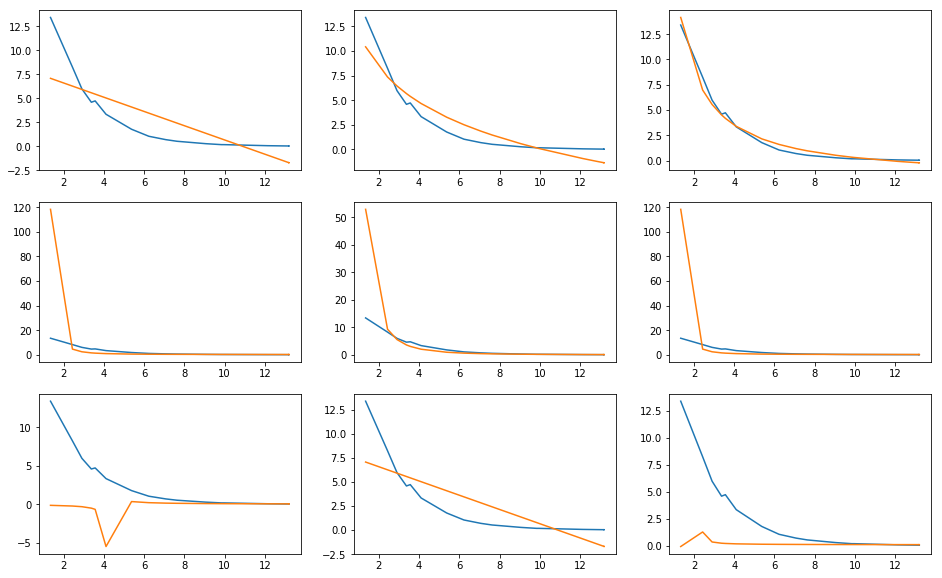

In [65]:
fig, axs = plt.subplots(3,3)
for m in range(9):
    i = m // 3
    j = m %  3
    axs[i][j].plot(X_data, Y_data)
    axs[i][j].plot(X_data, models[m][1])

In [67]:
errors = [np.sum((Y_data - m[1])**2) for m in models]

In [68]:
errors

[78.708994528880538,
 26.474655280381146,
 3.8394001413590475,
 11043.533479223805,
 1569.2658158561787,
 11043.533479223805,
 431.10551611171803,
 78.708994528880538,
 316.55323784688244]